# 1번
날씨 온도 예측, 종속변수 :actual(최고온도)   
데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0     
데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv    
temp_1 : 전날 최고온도    
temp_2 : 전전날 최고온도    
friend : 친구의 예측온도     



### 1-1 데이터 확인 및 전처리
- 데이터 EDA 수행     
- 결측치를 확인하고 처리 방안에 대해 논의하라  
- 데이터 분할 방법 설명     
- 최종 데이터셋이 적절함을 주장하라     

In [ ]:
# 예시
import pandas as pd 
import seaborn as sns
df =pd.read_csv('problem1.csv')

df.head()
sns.pairplot(df)
df.info()
df.describe()
df.isnull().sum()
df['date'] =df['year'].astype('str')+'-'+df['month'].astype('str')+'-'+df['day'].astype('str')
df['date'] = pd.to_datetime(df['date'])
v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values

a=set(v) - set(df['date'].dt.strftime('%Y-%m-%d'))
print(a)
len(a)

### Answer 
데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.     
문제 해결시 시계열 방식으로 접근 하지 않을것이기에 
누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.     
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.    
    
데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.     

### 1-2 Random Forest 모델 적합 및 검증
- 예측 기준선 수립 및 근거 제시     
- Random Forest 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

### 1-3 SVM(Support Vector Machine) 모델 적합 및 검증
- 예측 기준선 수립 및 근거 제시     
- Random Forest 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

### 1-4 모델 비교 및 향후 개선 방향 도출
- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택    
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?    
- 모델링 관련 추후 개선 방향 제시     

# 2번 
5분간격의 가구별 전력 사용량의 데이터    
데이터 출처 : 자체생성    
데이터 경로 : /kaggle/input/adp-kr-p2/problem2.csv    

### 2-1 데이터 전처리
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.    
군집화를 위한 데이터 구성의 이유를 설명하라    
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2.png?raw=true)

In [ ]:
import pandas as pd
import numpy as np

pro = pd.read_csv('problem2.csv')
pro1 = pro.sort_values(['houseCode','date']).reset_index(drop=True)
pro1.head()

,houseCode,date,power consumption
0,house_00,2050-01-01 00:00:00,58.253938
1,house_00,2050-01-01 00:05:00,21.731130
2,house_00,2050-01-01 00:10:00,56.264884
3,house_00,2050-01-01 00:15:00,27.894691
4,house_00,2050-01-01 00:20:00,24.690939


In [ ]:
pro1['date'] = pd.to_datetime(pro1['date'])
pro2 = pro1.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()
pro2 = pro2.rename(columns= {'power consumption':'power consumption sum'})
  
pro2

,houseCode,date,power consumption sum
0,house_00,2050-01-01 00:00:00,136.249952
1,house_00,2050-01-01 00:15:00,98.283387
2,house_00,2050-01-01 00:30:00,53.967679
3,house_00,2050-01-01 00:45:00,204.821270
4,house_00,2050-01-01 01:00:00,150.760786
...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717
133916,house_44,2050-01-31 23:00:00,463.419892
133917,house_44,2050-01-31 23:15:00,369.930740
133918,house_44,2050-01-31 23:30:00,237.713030


In [ ]:
# 정답
pro_3 = pro2.copy()

pro_3['c'] =pro_3['houseCode'].str[-2:].astype('int') # housecode 끝 두자리 int변환
pro_3['d'] =pro_3['date'].dt.hour # date 시간 변환
pro_3['e'] =pro_3['date'].dt.day # date 일 변환


from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(pro_3.iloc[:,2:].values)

pro_3['Cluster'] =kmeans.labels_

pro_3

,houseCode,date,power consumption sum,c,d,e,Cluster
0,house_00,2050-01-01 00:00:00,136.249952,0,0,1,4
1,house_00,2050-01-01 00:15:00,98.283387,0,0,1,4
2,house_00,2050-01-01 00:30:00,53.967679,0,0,1,4
3,house_00,2050-01-01 00:45:00,204.821270,0,0,1,0
4,house_00,2050-01-01 01:00:00,150.760786,0,1,1,0
...,...,...,...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,44,22,31,1
133916,house_44,2050-01-31 23:00:00,463.419892,44,23,31,3
133917,house_44,2050-01-31 23:15:00,369.930740,44,23,31,1
133918,house_44,2050-01-31 23:30:00,237.713030,44,23,31,2


### 2-2 히트맵
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라    
(수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)     
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2_Example.png?raw=true)

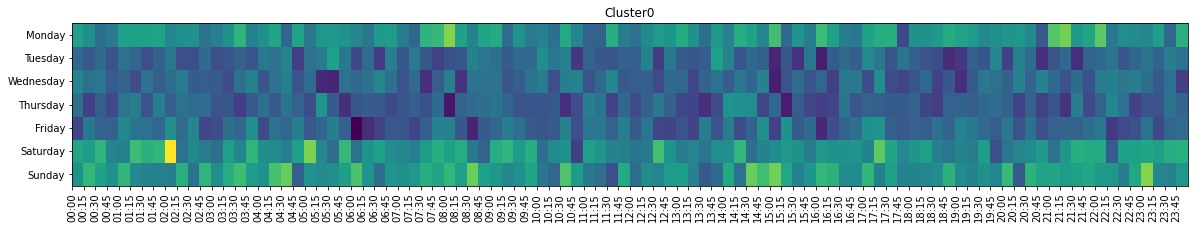

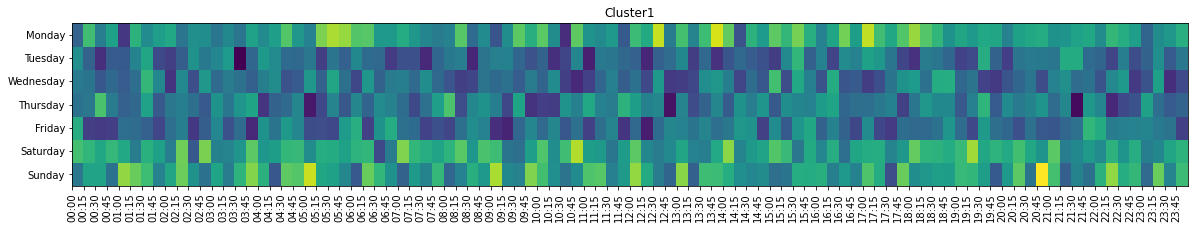

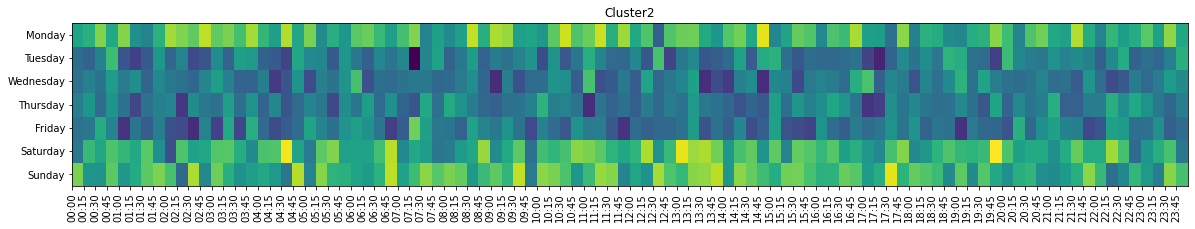

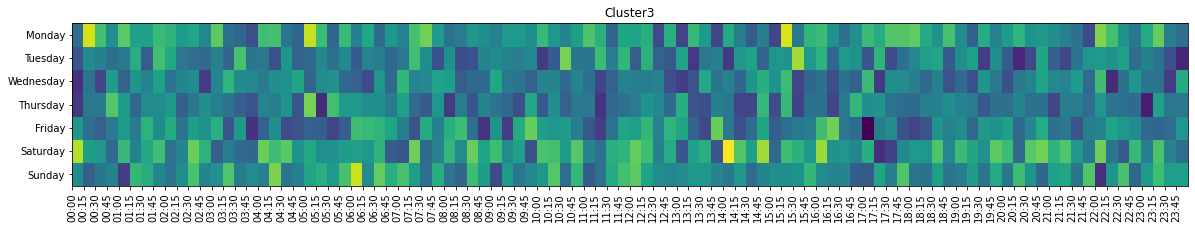

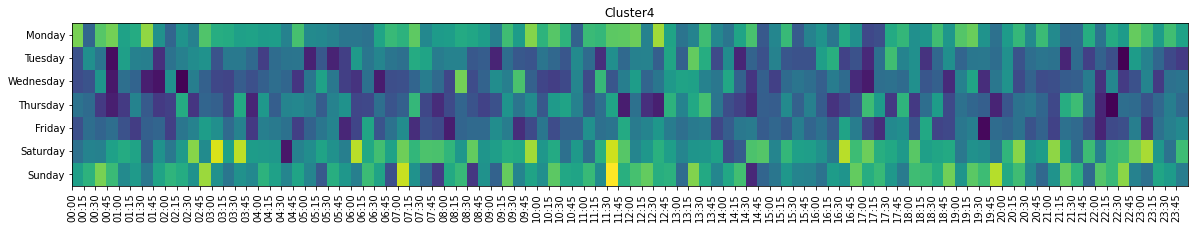

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pro_3['day'] = pro_3.date.dt.day_name()

pro_3['min'] = pro_3.date.dt.strftime('%H:%M')

table = pro_3.groupby(['Cluster','day','min'],as_index=False).sum()
for v in range(5):
    plt.figure(figsize=(20,3))
    target = table.loc[table.Cluster==v]
    pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('Cluster'+str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns,rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5,pvt.index)


# 3번 태양광 데이터
예측 변수 :SOLAR PV


데이터 경로 : /kaggle/input/adp-kr-p2/problem3.csv    
데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018

### 3-1
**데이터셋 분할 및 결과 검증**    
- 데이터셋 7:3 분할    
- 데이터 전처리 및 예측 모델 생성    
- 모델 성능 검증 : RMSE, R제곱, 정확도로 구하여라    
- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균내라. 분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

- 최종 결과 제출 : 소수점 3째자리 반올림     

In [ ]:
pro3 = pd.read_csv('problem3.csv')
pro3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [ ]:
pro3.columns

Index(['TIMESTAMP', 'BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'Hour', 'SMALL HYDRO',
       'SOLAR', 'SOLAR PV', 'SOLAR THERMAL', 'WIND TOTAL'],
      dtype='object')

In [ ]:
pro3.drop('SOLAR', axis = 1,inplace = True)
pro3.dropna()
pro3.isna().sum()

TIMESTAMP        0
BIOGAS           0
BIOMASS          0
GEOTHERMAL       0
Hour             0
SMALL HYDRO      0
SOLAR PV         0
SOLAR THERMAL    0
WIND TOTAL       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = pro3.iloc[: , 1:6] + pro3.iloc[: , -2:] 
y = pro3.iloc[:,7]

X = X.astype('float16')
y = y.astype('float16')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(np.isnan(X))

(31432, 7)
(13472, 7)
       BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  SOLAR THERMAL  \
0        True     True        True  True         True           True   
1        True     True        True  True         True           True   
2        True     True        True  True         True           True   
3        True     True        True  True         True           True   
4        True     True        True  True         True           True   
...       ...      ...         ...   ...          ...            ...   
44899    True     True        True  True         True           True   
44900    True     True        True  True         True           True   
44901    True     True        True  True         True           True   
44902    True     True        True  True         True           True   
44903    True     True        True  True         True           True   

       WIND TOTAL  
0            True  
1            True  
2            True  
3            True  
4            

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse')
rf.fit(X_train, y_train)
y_preds = lr.predict(X_train)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'rmse = {rmse : 0.4f}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').